In [1]:
import tensorflow as tf
import numpy as np
#dataset
mnist = tf.keras.datasets.mnist
# imports for array-handling and plotting
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\uthir\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#split data set into train and test
(x_train, y_train),(x_test, y_test) = mnist.load_data()

to understand the data set. <br>
Train data is 60,000 28x28 where 60,000 is the size of the label <br>

In [3]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [4]:
# Check state of dataset
data_summary(x_train, y_train, x_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [5]:
#normalize the set
x_train, x_test = x_train / 255.0, x_test / 255.0

Fully connected layers are defined using the Dense class. We can specify the number of neurons in the layer as the first argument, the initialization method as the second argument as init and specify the activation function using the activation argument

#We have successfully did data transformation.
#Sequential class is to define a linear stack of network layers  making it a model
#Flatten layer converts the features to a single column that is sent to fully connected layer. Converts 2D into 1D
#Dense is fully connected layer with the activation function defined as relu and softmax. The Number specified is the nodes that the layer is going to have
#Dropout is to avoid overfitting. Dropout drops 20% of the connections of neurons 


In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.8915 - acc: 0.7036
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.6382 - acc: 0.7943
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.5881 - acc: 0.8098
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.5570 - acc: 0.8204
Epoch 5/5
10000/10000 [==============================] - 1s 53us/step


[0.29802542799115184, 0.9138]

Funtion to get the weights and its Layer

In [8]:
def get_weights(model):
    names = [weight.name for layer in model.layers for weight in layer.weights]
    weights = model.get_weights()
    print("Layer Name and weights")
    for name, weight in zip(names, weights):
        print(name, weight.shape)
    return weights

Ploting the weight

In [9]:
def ploting(weights):
    fig, axes = plt.subplots(2,5)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = weights[0].min(), weights[0].max()
    for coef, ax in zip(weights[0].T, axes.ravel()):
        ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
                   vmax=.5 * vmax)
        ax.set_xticks(())
        ax.set_yticks(())
    plt.show()

Printing Weight's shape

In [10]:
weights=get_weights(model)

Layer Name and weights
dense/kernel:0 (784, 10)
dense/bias:0 (10,)
dense_1/kernel:0 (10, 10)
dense_1/bias:0 (10,)


Display image

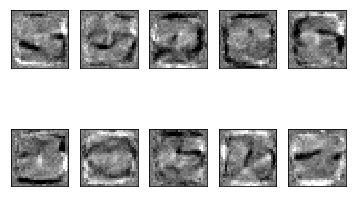

In [11]:
ploting(weights)

MOdel

In [12]:
def Nmodel(x,acc):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(x, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    score=model.evaluate(x_test, y_test)
    print("Loss and Accuracy for test data")
    print(score)
    acc.append(score[1])
    return model, acc

Changing the number of hidden nodes to 1, 10, 50 and 100 and to check how the testing accuracy
changes for the testing dataset. 

Hidden Nodes is 1
Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 2.0856 - acc: 0.2084
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 1.9914 - acc: 0.2321
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 1.9722 - acc: 0.2374
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 1.9619 - acc: 0.2398
Epoch 5/5
10000/10000 [==============================] - 1s 58us/step
Loss and Accuracy for test data
[1.8097112745285033, 0.2797]
Layer Name and weights
dense_2/kernel:0 (784, 1)
dense_2/bias:0 (1,)
dense_3/kernel:0 (1, 10)
dense_3/bias:0 (10,)
In 2D


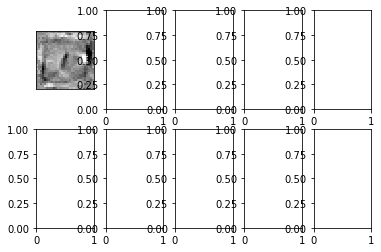

Hidden Nodes is 10
Epoch 1/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.8477 - acc: 0.7150
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.6082 - acc: 0.7963
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.5782 - acc: 0.8105
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.5567 - acc: 0.8199
Epoch 5/5
10000/10000 [==============================] - 1s 62us/step
Loss and Accuracy for test data
[0.3040454926133156, 0.915]
Layer Name and weights
dense_4/kernel:0 (784, 10)
dense_4/bias:0 (10,)
dense_5/kernel:0 (10, 10)
dense_5/bias:0 (10,)
In 2D


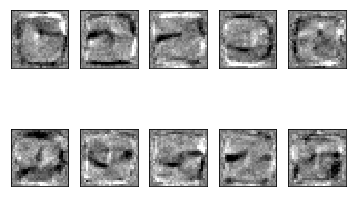

Hidden Nodes is 50
Epoch 1/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.4011 - acc: 0.8837
Epoch 2/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.2192 - acc: 0.9361
Epoch 3/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.1781 - acc: 0.9463
Epoch 4/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.1581 - acc: 0.9520
Epoch 5/5
10000/10000 [==============================] - 1s 67us/step
Loss and Accuracy for test data
[0.10704350860007107, 0.9666]
Layer Name and weights
dense_6/kernel:0 (784, 50)
dense_6/bias:0 (50,)
dense_7/kernel:0 (50, 10)
dense_7/bias:0 (10,)
In 2D


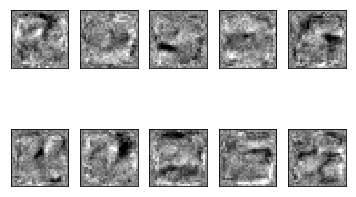

Hidden Nodes is 100
Epoch 1/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.3150 - acc: 0.9086
Epoch 2/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.1593 - acc: 0.9522
Epoch 3/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.1229 - acc: 0.9634
Epoch 4/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.1010 - acc: 0.9698
Epoch 5/5
10000/10000 [==============================] - 1s 76us/step
Loss and Accuracy for test data
[0.08166493655289524, 0.9748]
Layer Name and weights
dense_8/kernel:0 (784, 100)
dense_8/bias:0 (100,)
dense_9/kernel:0 (100, 10)
dense_9/bias:0 (10,)
In 2D


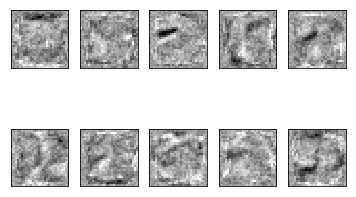

In [13]:
li=[1,10,50,100]
acc=[]
for i in li:
    print("Hidden Nodes is "+ str(i))
    model,acc=Nmodel(i,acc)
    weights=get_weights(model)
    print("In 2D")
    ploting(weights)


PLoting Accuracy in Pie chat

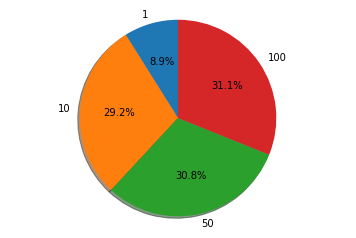

In [14]:
fig1, ax1 = plt.subplots()
ax1.pie(acc, labels=li, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Plotting accuracy in line chart

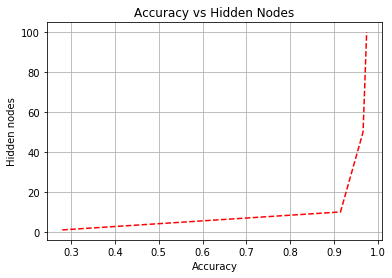

In [15]:
fig, ax = plt.subplots()
ax.plot(acc, li, '--r', markersize=15)

ax.set(xlabel='Accuracy', ylabel='Hidden nodes',
       title='Accuracy vs Hidden Nodes')
ax.grid()
plt.show()